Face Detection test using Haarcascades

In [2]:
import cv2, queue, threading, time

# bufferless VideoCapture
class VideoCapture:

  def __init__(self, name):
    self.cap = cv2.VideoCapture(name)
    self.q = queue.Queue()
    t = threading.Thread(target=self._reader)
    t.daemon = True
    t.start()

  # read frames as soon as they are available, keeping only most recent one
  def _reader(self):
    while True:
      ret, frame = self.cap.read()
      if not ret:
        break
      if not self.q.empty():
        try:
          self.q.get_nowait()   # discard previous (unprocessed) frame
        except queue.Empty:
          pass
      self.q.put(frame)

  def read(self):
    return self.q.get()

cap = VideoCapture(0)
faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 255, 0)
fontsize = 2
while True:
  frame = cap.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(
    gray,     
    scaleFactor=1.2,
    minNeighbors=5,     
    minSize=(10, 10)
  )
  for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    #print(f'X : {x} \t Y : {y}')
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    position = (x, y)
    try :
        if x < 50 :
            cv2.putText(frame, f'x : {x} : LEFT', position, font, fontsize, color=color)
        elif x > 350 :
            cv2.putText(frame, f'x : {x} : RIGHT', position, font, fontsize, color=color)
        else :
            cv2.putText(frame, f'x : {x}', position, font, fontsize, color=color)
    except NameError :
        pass
  cv2.imshow("frame", frame)
  if chr(cv2.waitKey(1)&255) == 'q':
    cv2.destroyAllWindows()
    break


In [1]:
import cv2
import time
cap = cv2.VideoCapture(1)
faceCascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
color = (0, 255, 0)
fontsize = 2

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(10, 10)
    )
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        #print(f'X : {x} \t Y : {y}')
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        position = (x, y)
    try :
        if x < 50 :
            cv2.putText(frame, f'x : {x} : LEFT', position, font, fontsize, color=color)
        elif x > 350 :
            cv2.putText(frame, f'x : {x} : RIGHT', position, font, fontsize, color=color)
        else :
            cv2.putText(frame, f'x : {x}', position, font, fontsize, color=color)
    except NameError :
        pass
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
cap.release()
cv2.destroyAllWindows()

[ WARN:0@0.017] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video1): can't open camera by index
[ERROR:0@0.132] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import urllib.request
import cv2
import numpy as np
import time
URL = "http://192.168.43.1:8080"
while True:    
    img_arr = np.array(bytearray(urllib.request.urlopen(URL).read()),dtype=np.uint8)
    img = cv2.imdecode(img_arr,-1)
    cv2.imshow('IPWebcam',img)
    
    if cv2.waitKey(1):
        break

Dataset farmer

In [4]:
import cv2, sys, numpy, os
import time
haar_file = 'haarcascades/haarcascade_frontalface_default.xml'

datasets = 'datasets_VGG'  
  
sub_data = input("Name >> ") #<-----
    
face_id = 0
(width, height) = (224, 224)

path = os.path.join(datasets, sub_data)
if not os.path.isdir(path):
    os.mkdir(path)


face_cascade = cv2.CascadeClassifier(haar_file)
webcam = cv2.VideoCapture(0) 

count = 1
while count < 300: 
    (_, im) = webcam.read()
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
        face = im[y :y + h , x :x + w]
        face_resize = cv2.resize(face, (width, height))
        cv2.imwrite('% s/% s.png' % (path, count), face_resize)
    count += 1
      
    cv2.imshow('OpenCV', im)
    key = cv2.waitKey(10)
    if key == 27:
        break
    time.sleep(0.1)
cv2.destroyAllWindows()

Load image to TensorFlow

In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
images = []
images.append(tf.data.Dataset.list_files('datasets_VGG/elf/*.png'))
images.append(tf.data.Dataset.list_files('datasets_VGG/aonan/*.png'))

In [9]:
images

[<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>]

In [10]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [11]:
images[0] = images[0].map(load_image)
images[1] = images[1].map(load_image)

In [12]:
type(images[0])

tensorflow.python.data.ops.dataset_ops.MapDataset

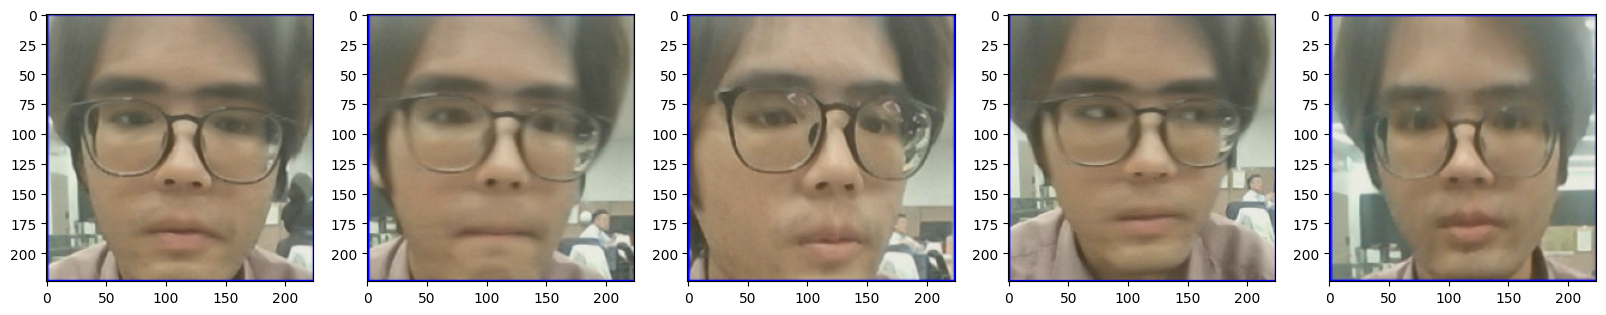

In [14]:
image_generator_elf = images[0].batch(5).as_numpy_iterator()
plot_images_elf = image_generator_elf.next()
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, image in enumerate(plot_images_elf):
    ax[idx].imshow(image) 
plt.show()

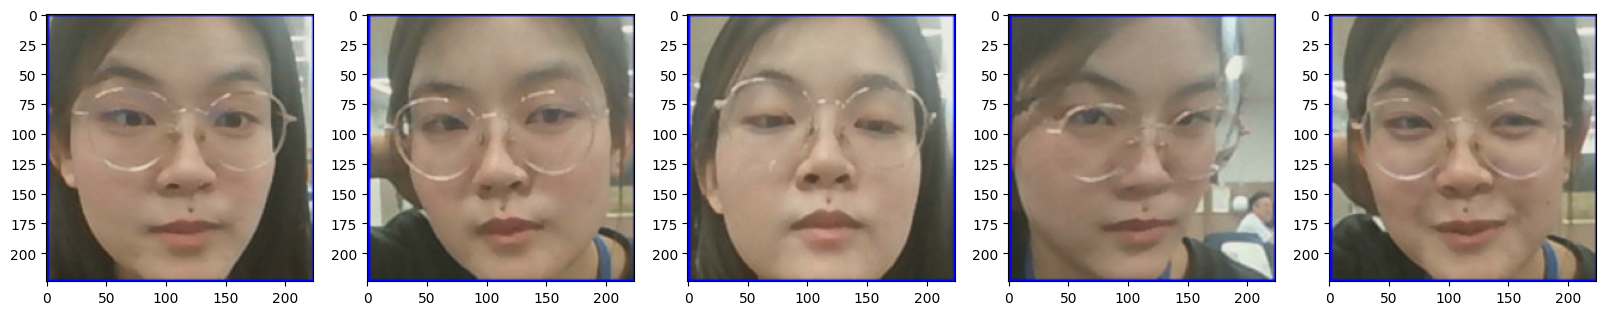

In [16]:
image_generator_aonan = images[1].batch(5).as_numpy_iterator()
plot_images_aonan = image_generator_aonan.next()
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, image in enumerate(plot_images_aonan):
    ax[idx].imshow(image) 
plt.show()

In [27]:
label = 1
name = 'aonan'

In [28]:
import os

file_name_list = os.listdir(f'datasets_VGG/{name}')

print(file_name_list)
id = 0
for f in file_name_list:
    print(f'{id} : {f}')
    id+=1

['1.png', '10.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png', '107.png', '108.png', '109.png', '11.png', '110.png', '111.png', '112.png', '113.png', '114.png', '115.png', '116.png', '117.png', '118.png', '119.png', '12.png', '120.png', '121.png', '122.png', '123.png', '124.png', '125.png', '126.png', '127.png', '128.png', '129.png', '13.png', '130.png', '131.png', '132.png', '133.png', '134.png', '135.png', '136.png', '137.png', '138.png', '139.png', '14.png', '140.png', '141.png', '142.png', '143.png', '144.png', '145.png', '146.png', '147.png', '148.png', '149.png', '15.png', '150.png', '151.png', '152.png', '153.png', '154.png', '155.png', '156.png', '157.png', '158.png', '159.png', '16.png', '160.png', '161.png', '162.png', '163.png', '164.png', '165.png', '166.png', '167.png', '168.png', '169.png', '17.png', '170.png', '171.png', '172.png', '173.png', '174.png', '175.png', '176.png', '177.png', '178.png', '179.png', '18.png', '180.png', '181.png'

In [29]:
import os

id = 0

for f in file_name_list:
    print(f'datasets_VGG/{name}/{f} --> datasets_LBPH2/User.{label}.{id}.png')
    os.rename(f'datasets_VGG/{name}/{f}', f'datasets_LBPH2/User.{label}.{id}.png')
    id+=1

datasets_VGG/aonan/1.png --> datasets_LBPH2/User.1.0.png
datasets_VGG/aonan/10.png --> datasets_LBPH2/User.1.1.png
datasets_VGG/aonan/100.png --> datasets_LBPH2/User.1.2.png
datasets_VGG/aonan/101.png --> datasets_LBPH2/User.1.3.png
datasets_VGG/aonan/102.png --> datasets_LBPH2/User.1.4.png
datasets_VGG/aonan/103.png --> datasets_LBPH2/User.1.5.png
datasets_VGG/aonan/104.png --> datasets_LBPH2/User.1.6.png
datasets_VGG/aonan/105.png --> datasets_LBPH2/User.1.7.png
datasets_VGG/aonan/106.png --> datasets_LBPH2/User.1.8.png
datasets_VGG/aonan/107.png --> datasets_LBPH2/User.1.9.png
datasets_VGG/aonan/108.png --> datasets_LBPH2/User.1.10.png
datasets_VGG/aonan/109.png --> datasets_LBPH2/User.1.11.png
datasets_VGG/aonan/11.png --> datasets_LBPH2/User.1.12.png
datasets_VGG/aonan/110.png --> datasets_LBPH2/User.1.13.png
datasets_VGG/aonan/111.png --> datasets_LBPH2/User.1.14.png
datasets_VGG/aonan/112.png --> datasets_LBPH2/User.1.15.png
datasets_VGG/aonan/113.png --> datasets_LBPH2/User.1.1

In [30]:
print(file_name_list)

['1.png', '10.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png', '107.png', '108.png', '109.png', '11.png', '110.png', '111.png', '112.png', '113.png', '114.png', '115.png', '116.png', '117.png', '118.png', '119.png', '12.png', '120.png', '121.png', '122.png', '123.png', '124.png', '125.png', '126.png', '127.png', '128.png', '129.png', '13.png', '130.png', '131.png', '132.png', '133.png', '134.png', '135.png', '136.png', '137.png', '138.png', '139.png', '14.png', '140.png', '141.png', '142.png', '143.png', '144.png', '145.png', '146.png', '147.png', '148.png', '149.png', '15.png', '150.png', '151.png', '152.png', '153.png', '154.png', '155.png', '156.png', '157.png', '158.png', '159.png', '16.png', '160.png', '161.png', '162.png', '163.png', '164.png', '165.png', '166.png', '167.png', '168.png', '169.png', '17.png', '170.png', '171.png', '172.png', '173.png', '174.png', '175.png', '176.png', '177.png', '178.png', '179.png', '18.png', '180.png', '181.png'